In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

### Taking a look at the Data that is the New York Collisions data

In [23]:
data = pd.read_csv('NYC_Collisions.csv')
data.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Collision ID         238421 non-null  int64  
 1   Date                 238421 non-null  object 
 2   Time                 238421 non-null  object 
 3   Borough              231224 non-null  object 
 4   Street Name          238058 non-null  object 
 5   Cross Street         111291 non-null  object 
 6   Latitude             216098 non-null  float64
 7   Longitude            216098 non-null  float64
 8   Contributing Factor  237134 non-null  object 
 9   Vehicle Type         238421 non-null  object 
 10  Persons Injured      238420 non-null  float64
 11  Persons Killed       238421 non-null  int64  
 12  Pedestrians Injured  238421 non-null  int64  
 13  Pedestrians Killed   238421 non-null  int64  
 14  Cyclists Injured     238421 non-null  int64  
 15  Cyclists Killed  

### Checking how many missing data points we have

In [25]:
missing_val_count = data.isnull().sum()
data.isnull().sum()

Collision ID                0
Date                        0
Time                        0
Borough                  7197
Street Name               363
Cross Street           127130
Latitude                22323
Longitude               22323
Contributing Factor      1287
Vehicle Type                0
Persons Injured             1
Persons Killed              0
Pedestrians Injured         0
Pedestrians Killed          0
Cyclists Injured            0
Cyclists Killed             0
Motorists Injured           0
Motorists Killed            0
dtype: int64

In [26]:
total_cells = np.product(data.shape)
total_missing = missing_val_count.sum()
print("Percent of missing values :", 
      round((total_missing/total_cells)*100, 2),'%')

Percent of missing values : 4.21 %


<Axes: >

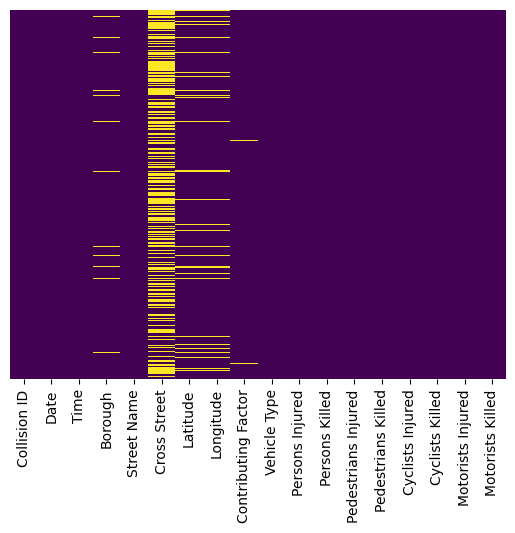

In [27]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### Which columns have missing data

In [28]:
data[['Borough', 'Street Name', 'Cross Street', 'Latitude',
      'Longitude', 'Contributing Factor', 'Persons Injured']].isnull().sum()

Borough                  7197
Street Name               363
Cross Street           127130
Latitude                22323
Longitude               22323
Contributing Factor      1287
Persons Injured             1
dtype: int64

In [29]:
#Making a Copy of the data
df_copy = data

### Filling in missing Values in column 'Contributing Factor'

In [30]:
df_copy['Contributing Factor'].fillna('Unspecified', inplace = True)
df_copy

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.833980,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.687300,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.882700,-73.892730,Unspecified,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.637910,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238416,4619581,2023-04-09,04:21:00,Brooklyn,Meeker Avenue,NaN,40.715443,-73.951850,Failure to Yield Right-of-Way,Not Reported,1.0,0,1,0,0,0,0,0
238417,4619685,2023-04-09,08:30:00,Queens,Elbertson Street,Elmhurst Avenue,40.746864,-73.877170,Backing Unsafely,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238418,4619519,2023-04-09,21:19:00,Brooklyn,Cortelyou Road,East 17 Street,40.642017,-73.962660,Unspecified,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238419,4619921,2023-04-09,11:00:00,Manhattan,West 50 Street,NaN,40.763790,-73.989655,Driver Inattention/Distraction,Transport,0.0,0,0,0,0,0,0,0


In [31]:
# Handling missing values for 'Latitude' and 'Longitude' with mean
df_copy['Latitude'].fillna(df_copy['Latitude'].mean(), inplace=True)
df_copy['Longitude'].fillna(df_copy['Longitude'].mean(), inplace=True)

# For 'Cross Street', filling missing values with 'Unknown'
df_copy['Cross Street'].fillna('Unknown', inplace=True)


In [32]:
# Converting 'Date' and 'Time' to datetime
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy['Time'] = pd.to_datetime(df_copy['Time'], format='%H:%M:%S').dt.time


In [33]:
# Removing duplicate rows
df_copy.drop_duplicates(inplace=True)


In [34]:
# Converting 'Date' and 'Time' to datetime
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy['Time'] = pd.to_datetime(df_copy['Time'], format='%H:%M:%S').dt.time


In [35]:
# Removing duplicate rows
df_copy.drop_duplicates(inplace=True)

In [36]:
df_copy.head(15)

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,Unknown,40.833980,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,Unknown,40.687300,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,Unknown,40.724492,-73.916623,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.882700,-73.892730,Unspecified,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.637910,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
5,4380963,2021-01-01,18:45:00,Manhattan,Harlem River Drive,Unknown,40.848630,-73.927620,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Passenger Vehicle,0.0,0,0,0,0,0,0,0
6,4381116,2021-01-01,04:51:00,Brooklyn,Junius Street,Unknown,40.660090,-73.900550,Other Vehicular,Passenger Vehicle,0.0,0,0,0,0,0,0,0
7,4382500,2021-01-01,16:14:00,Brooklyn,Morgan Avenue,Unknown,40.705807,-73.931760,Passing Too Closely,Passenger Vehicle,0.0,0,0,0,0,0,0,0
8,4381082,2021-01-01,22:15:00,Brooklyn,Utica Avenue,East New York Avenue,40.663227,-73.931590,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
9,4381388,2021-01-01,12:00:00,Brooklyn,Elton Street,Unknown,40.671482,-73.882840,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [37]:
df_copy.isnull().sum()

Collision ID              0
Date                      0
Time                      0
Borough                7197
Street Name             363
Cross Street              0
Latitude                  0
Longitude                 0
Contributing Factor       0
Vehicle Type              0
Persons Injured           1
Persons Killed            0
Pedestrians Injured       0
Pedestrians Killed        0
Cyclists Injured          0
Cyclists Killed           0
Motorists Injured         0
Motorists Killed          0
dtype: int64

In [38]:
df_copy

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,Unknown,40.833980,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,Unknown,40.687300,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,Unknown,40.724492,-73.916623,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.882700,-73.892730,Unspecified,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.637910,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238416,4619581,2023-04-09,04:21:00,Brooklyn,Meeker Avenue,Unknown,40.715443,-73.951850,Failure to Yield Right-of-Way,Not Reported,1.0,0,1,0,0,0,0,0
238417,4619685,2023-04-09,08:30:00,Queens,Elbertson Street,Elmhurst Avenue,40.746864,-73.877170,Backing Unsafely,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238418,4619519,2023-04-09,21:19:00,Brooklyn,Cortelyou Road,East 17 Street,40.642017,-73.962660,Unspecified,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238419,4619921,2023-04-09,11:00:00,Manhattan,West 50 Street,Unknown,40.763790,-73.989655,Driver Inattention/Distraction,Transport,0.0,0,0,0,0,0,0,0


In [81]:
from geopy.geocoders import Nominatim
import time
def get_location_by_coordinates(lat, lon):
    geolocator = Nominatim(user_agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36 Edg/123.0.0.0")
    for _ in range(5):  # Retry up to 5 times
        try:
            location = geolocator.reverse([lat, lon], timeout=10)
            address = location.address.split()
            time.sleep(1)
            return ' '.join(address[:3])
        except Exception as e:
            print(f"Attempt failed with error {e}. Retrying.")
            time.sleep(2)  # Wait for 2 seconds before retrying
    return None  # Return None if all attempts fail


# Test the function
print(get_location_by_coordinates(4.83398, -73.82635))

Guasca, Guavio, Cundinamarca,


In [83]:
df_copy

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,"Bruckner Expressway, Schuylerville,",40.833980,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,"100, Lafayette Avenue,",40.687300,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,"57-15, Railroad Place,",40.724492,-73.916623,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.882700,-73.892730,Unspecified,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.637910,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238416,4619581,2023-04-09,04:21:00,Brooklyn,Meeker Avenue,Unknown,40.715443,-73.951850,Failure to Yield Right-of-Way,Not Reported,1.0,0,1,0,0,0,0,0
238417,4619685,2023-04-09,08:30:00,Queens,Elbertson Street,Elmhurst Avenue,40.746864,-73.877170,Backing Unsafely,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238418,4619519,2023-04-09,21:19:00,Brooklyn,Cortelyou Road,East 17 Street,40.642017,-73.962660,Unspecified,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238419,4619921,2023-04-09,11:00:00,Manhattan,West 50 Street,Unknown,40.763790,-73.989655,Driver Inattention/Distraction,Transport,0.0,0,0,0,0,0,0,0


In [84]:
unknown_cross_streets = df_copy[df_copy['Cross Street'] == 'Unknown']

# Process in batches of 5
for i in range(0, len(unknown_cross_streets), 5):
    batch = unknown_cross_streets.iloc[i:i+5]
    for index, row in batch.iterrows():
        location = get_location_by_coordinates(row['Latitude'], row['Longitude'])
        df_copy.loc[index, 'Cross Street'] = location
    print(f"Processed batch {i//5 + 1}")


Processed batch 1
Processed batch 2
Processed batch 3
Processed batch 4
Processed batch 5
Processed batch 6
Processed batch 7
Processed batch 8
Processed batch 9
Processed batch 10
Processed batch 11
Processed batch 12
Processed batch 13
Processed batch 14
Processed batch 15
Processed batch 16
Processed batch 17
Processed batch 18
Processed batch 19
Processed batch 20
Processed batch 21
Processed batch 22
Processed batch 23
Processed batch 24
Processed batch 25
Processed batch 26
Processed batch 27
Processed batch 28
Processed batch 29
Processed batch 30
Processed batch 31
Processed batch 32
Processed batch 33
Processed batch 34
Processed batch 35
Processed batch 36
Processed batch 37
Processed batch 38
Processed batch 39
Processed batch 40
Processed batch 41
Processed batch 42
Processed batch 43
Processed batch 44
Processed batch 45
Processed batch 46
Processed batch 47
Processed batch 48
Processed batch 49
Processed batch 50
Processed batch 51
Processed batch 52
Processed batch 53
Pr

Processed batch 417
Processed batch 418
Processed batch 419
Processed batch 420
Processed batch 421
Processed batch 422
Processed batch 423
Processed batch 424
Processed batch 425
Processed batch 426
Processed batch 427
Processed batch 428
Processed batch 429
Processed batch 430
Processed batch 431
Processed batch 432
Processed batch 433
Processed batch 434
Processed batch 435
Processed batch 436
Processed batch 437
Processed batch 438
Processed batch 439
Processed batch 440
Processed batch 441
Processed batch 442
Processed batch 443
Processed batch 444
Processed batch 445
Processed batch 446
Processed batch 447
Processed batch 448
Processed batch 449
Processed batch 450
Processed batch 451
Processed batch 452
Processed batch 453
Processed batch 454
Processed batch 455
Processed batch 456
Processed batch 457
Processed batch 458
Processed batch 459
Processed batch 460
Processed batch 461
Processed batch 462
Processed batch 463
Processed batch 464
Processed batch 465
Processed batch 466


KeyboardInterrupt: 

In [87]:
df_copy.to_csv('NY_cleaned.csv')